Contexto de Estudo de Caso:

Este estudo de caso se concentra em uma empresa de varejo média, enfrentando desafios com a gestão de inventário e sustentabilidade. O objetivo é aplicar as estratégias de otimização de inventário e análise de sustentabilidade para melhorar a eficiência operacional da empresa. A empresa possui uma variedade de produtos com diferentes ciclos de vida e demandas de mercado, tornando a gestão de inventário complexa e custosa. Através da análise detalhada de dados de vendas, aquisições e inventário, a empresa busca minimizar desperdícios, otimizar os níveis de estoque, e adotar uma abordagem mais sustentável e rentável para o gerenciamento de seus recursos.

Objetivos:

* Minimizar desperdícios otimizando os níveis de inventário.
Identificar as estratégias de compra mais eficientes baseadas em dados de vendas, aquisições e inventário.
Avaliar o desempenho de vendas dos produtos para formular uma abordagem sustentável de gestão de inventário.
Preprocessamento de Dados:

* Consolidar todos os arquivos CSV em um dataset mestre unificado.
Verificar entradas ausentes ou errôneas.
Padronizar formatos de data para análise de séries temporais consistente.
Análise de Inventário:

* Avaliar o status do inventário no início e no fim do ano usando BegInvFINAL12312016.csv e EndInvFINAL12312016.csv.
Identificar produtos com maior e menor presença no inventário.
Análise de Vendas:

* Examinar SalesFINAL12312016.csv para identificar os mais vendidos e produtos com vendas lentas.
Analisar tendências de vendas ao longo do tempo, considerando variáveis como quantidade de vendas, preço de venda e data.
Análise de Compras:

* Avaliar atividades de aquisição usando PurchasesFINAL12312016.csv e InvoicePurchases12312016.csv.
Investigar volumes de compra de diferentes fornecedores, custos de aquisição e processos da cadeia de suprimentos.
Cálculo do Nível de Estoque Ótimo:

* Determinar o nível de estoque ótimo para cada produto, aproveitando dados de vendas, aquisições e inventário.
Propor níveis de estoque adaptados à velocidade de vendas dos produtos e tempos de fornecimento.
Conclusão:
As percepções obtidas dessas análises fornecerão recomendações para gerenciar o inventário de maneira mais eficiente e sustentável, visando reduzir custos e prevenir excesso de estoque e desperdício.

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')

| Tabela       | purchase_prices      |
|----------------|-----------------|
| Brand          | Marca           |
| Description    | Descrição       |
| Price          | Preço           |
| Size           | Tamanho         |
| Volume         | Volume          |
| Classification | Classificação   |
| PurchasePrice  | Preço de Compra |
| VendorNumber   | Número do Fornecedor |
| VendorName     | Nome do Fornecedor   |


| Tabela      | beg_inv      |
|-------------|----------------|
| InventoryId | ID do Inventário |
| Store       | Loja           |
| City        | Cidade         |
| Brand       | Marca          |
| Description | Descrição      |
| Size        | Tamanho        |
| onHand      | Em Mão         |
| Price       | Preço          |
| startDate   | Data de Início |


| Tabela      | end_inv     |
|-------------|----------------|
| InventoryId | ID do Inventário |
| Store       | Loja           |
| City        | Cidade         |
| Brand       | Marca          |
| Description | Descrição      |
| Size        | Tamanho        |
| onHand      | Em Mão         |
| Price       | Preço          |
| endDate     | Data de Fim    |


| Tabela       | invoice_purchases         |
|---------------|--------------------|
| VendorNumber  | Número do Fornecedor |
| VendorName    | Nome do Fornecedor |
| InvoiceDate   | Data da Fatura     |
| PONumber      | Número do Pedido   |
| PODate        | Data do Pedido     |
| PayDate       | Data de Pagamento  |
| Quantity      | Quantidade         |
| Dollars       | Dólares            |
| Freight       | Frete              |
| Approval      | Aprovação          |

| Tabela | purchases |
|--------------------|-----------------------|
| InventoryId        | ID do Inventário      |
| Store              | Loja                  |
| Brand              | Marca                 |
| Description        | Descrição             |
| Size               | Tamanho               |
| VendorNumber       | Número do Fornecedor  |
| VendorName         | Nome do Fornecedor    |
| PONumber           | Número do Pedido      |
| PODate             | Data do Pedido        |
| ReceivingDate      | Data de Recebimento   |
| InvoiceDate        | Data da Fatura        |
| PayDate            | Data de Pagamento     |
| PurchasePrice      | Preço de Compra       |
| Quantity           | Quantidade            |
| Dollars            | Dólares               |
| Classification     | Classificação         |


| Tabela      | sales  |
|-------------------|-------------------------|
| InventoryId       | ID do Inventário        |
| Store             | Loja                    |
| Brand             | Marca                   |
| Description       | Descrição               |
| Size              | Tamanho                 |
| SalesQuantity     | Quantidade de Vendas    |
| SalesDollars      | Dólares de Vendas       |
| SalesPrice        | Preço de Vendas         |
| SalesDate         | Data de Vendas          |
| Volume            | Volume                  |
| Classification    | Classificação           |
| ExciseTax         | Imposto Especial        |
| VendorNo          | Número do Fornecedor    |
| VendorName        | Nome do Fornecedor      |

# Analisando

In [17]:
# Agrupando por Marca e Descrição e resumindo o inventário no início do ano
resumo_inicio = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Agrupando por Marca e Descrição e resumindo o inventário no final do ano
resumo_fim = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identificando os 5 produtos mais presentes no início e no final do ano
top_5_inicio = resumo_inicio.head(5)
top_5_fim = resumo_fim.head(5)

# Identificando os 5 produtos menos presentes no início e no final do ano
bottom_5_inicio = resumo_inicio.tail(5)
bottom_5_fim = resumo_fim.tail(5)

# Imprimindo os resultados
print("Top 5 produtos no início do ano:\n", top_5_inicio)
print("\nTop 5 produtos no final do ano:\n", top_5_fim)
print("\nBottom 5 produtos no início do ano:\n", bottom_5_inicio)
print("\nBottom 5 produtos no final do ano:\n", bottom_5_fim)

Top 5 produtos no início do ano:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 produtos no final do ano:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 produtos no início do ano:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 produtos no final do ano:
 Brand  Description                
22183  Ninety+Cellar

In [18]:
# Encontrando os produtos mais vendidos
produtos_mais_vendidos = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Dez produtos mais vendidos:\n{produtos_mais_vendidos}\n")

# Encontrando os produtos de movimentação lenta
produtos_movimentação_lenta = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Dez produtos de movimentação lenta:\n{produtos_movimentação_lenta}")

Dez produtos mais vendidos:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189

Dez produtos de movimentação lenta:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc 

In [19]:
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')
purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
average_supply_duration = purchases['SupplyDuration'].mean()
print("Duração média do fornecimento (em dias):", average_supply_duration)

Duração média do fornecimento (em dias): 7.620738941712323


In [20]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days
average_payment_duration = purchases['PaymentDuration'].mean()
print("Duração do pagamento médio (em dias):", average_payment_duration)

Duração do pagamento médio (em dias): 35.658806376803284


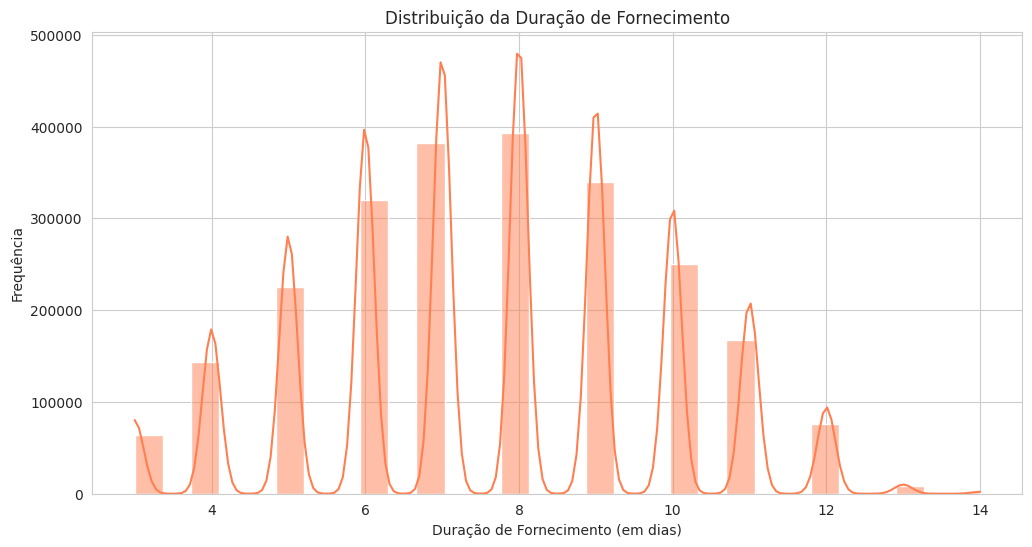

In [21]:
# Configurações de estilo
sns.set_style("whitegrid")

# Histograma para Duração de Fornecimento
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Distribuição da Duração de Fornecimento')
plt.xlabel('Duração de Fornecimento (em dias)')
plt.ylabel('Frequência')
plt.show()



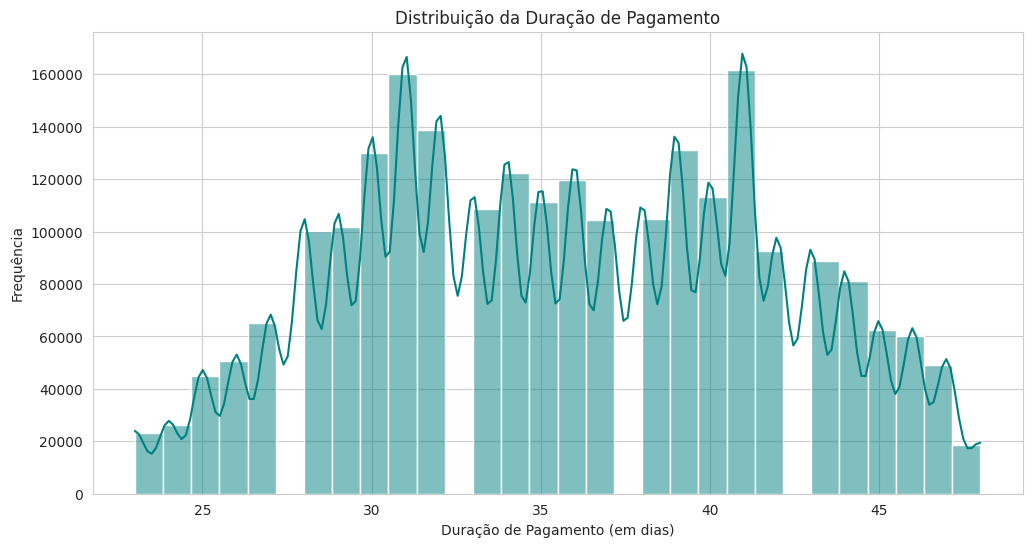

In [22]:
# Histograma para Duração de Pagamento
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Distribuição da Duração de Pagamento')
plt.xlabel('Duração de Pagamento (em dias)')
plt.ylabel('Frequência')
plt.show()


In [23]:
#Determinar o Período de Vendas:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days
total_days

59

In [24]:
#Calcular a Velocidade de Vendas para Cada Produto:
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days
sales_velocity['Sales_Per_Day']

0       4.881356
1       2.101695
2       0.406780
3       2.745763
4       2.220339
          ...   
7653    0.033898
7654    0.033898
7655    0.016949
7656    0.016949
7657    0.457627
Name: Sales_Per_Day, Length: 7658, dtype: float64

In [25]:
# Calcular o Tempo de entrega:
purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()
lead_times


,Brand,Description,Avg_Lead_Time
0,58,Gekkeikan Black & Gold Sake,7.758389
1,60,Canadian Club 1858 VAP,7.659794
2,61,Margaritaville Silver,8.115385
3,62,Herradura Silver Tequila,7.331570
4,63,Herradura Reposado Tequila,7.324427
...,...,...,...
10659,90089,Ch Lynch Bages 12 Pauillac,7.333333
10660,90090,Ch Lafite Rothschild 12,4.500000
10661,90604,Ch Lynch Bages Pauilac,7.384615
10662,90609,Flavor Essence Variety 5 Pak,10.363636


In [26]:
# Mesclar Dados de Vendas e Compras:
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')
merged_data 


,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794
2,61,Margaritaville Silver,24,0.406780,8.115385
3,62,Herradura Silver Tequila,162,2.745763,7.331570
4,63,Herradura Reposado Tequila,131,2.220339,7.324427
...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000


In [27]:
# Calculando o Estoque de Segurança usando as vendas máximas para cada produto
max_vendas = sales.groupby(['Brand', 'Description']).agg(Max_Vendas_Diarias=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_vendas, on=['Brand', 'Description'], how='left')
merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Max_Vendas_Diarias
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389,7
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794,3
2,61,Margaritaville Silver,24,0.406780,8.115385,12
3,62,Herradura Silver Tequila,162,2.745763,7.331570,3
4,63,Herradura Reposado Tequila,131,2.220339,7.324427,4
...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN,1
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000,2
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000,1
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000,1


In [28]:
# Calcular o Nível Ótimo de Estoque
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']
merged_data['Optimal_Stock_Level']


0       37.871459
1       16.098550
2        3.301173
3       20.130751
4       16.262712
          ...    
7653          NaN
7654     0.271186
7655     0.152542
7656     0.081356
7657     3.355932
Name: Optimal_Stock_Level, Length: 7658, dtype: float64

In [29]:
# Calcular o Estoque de Segurança:
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']
merged_data['Recommended_Stock_Level']

0       39.990104
1       16.996855
2       14.894394
3       20.384988
4       18.042373
          ...    
7653          NaN
7654     2.237288
7655     1.135593
7656     1.064407
7657    14.898305
Name: Recommended_Stock_Level, Length: 7658, dtype: float64

/tmp/ipykernel_9033/1009900184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=dados_ordenados.head(20), palette='viridis')  # mostrando os 20 produtos principais para melhor visualização


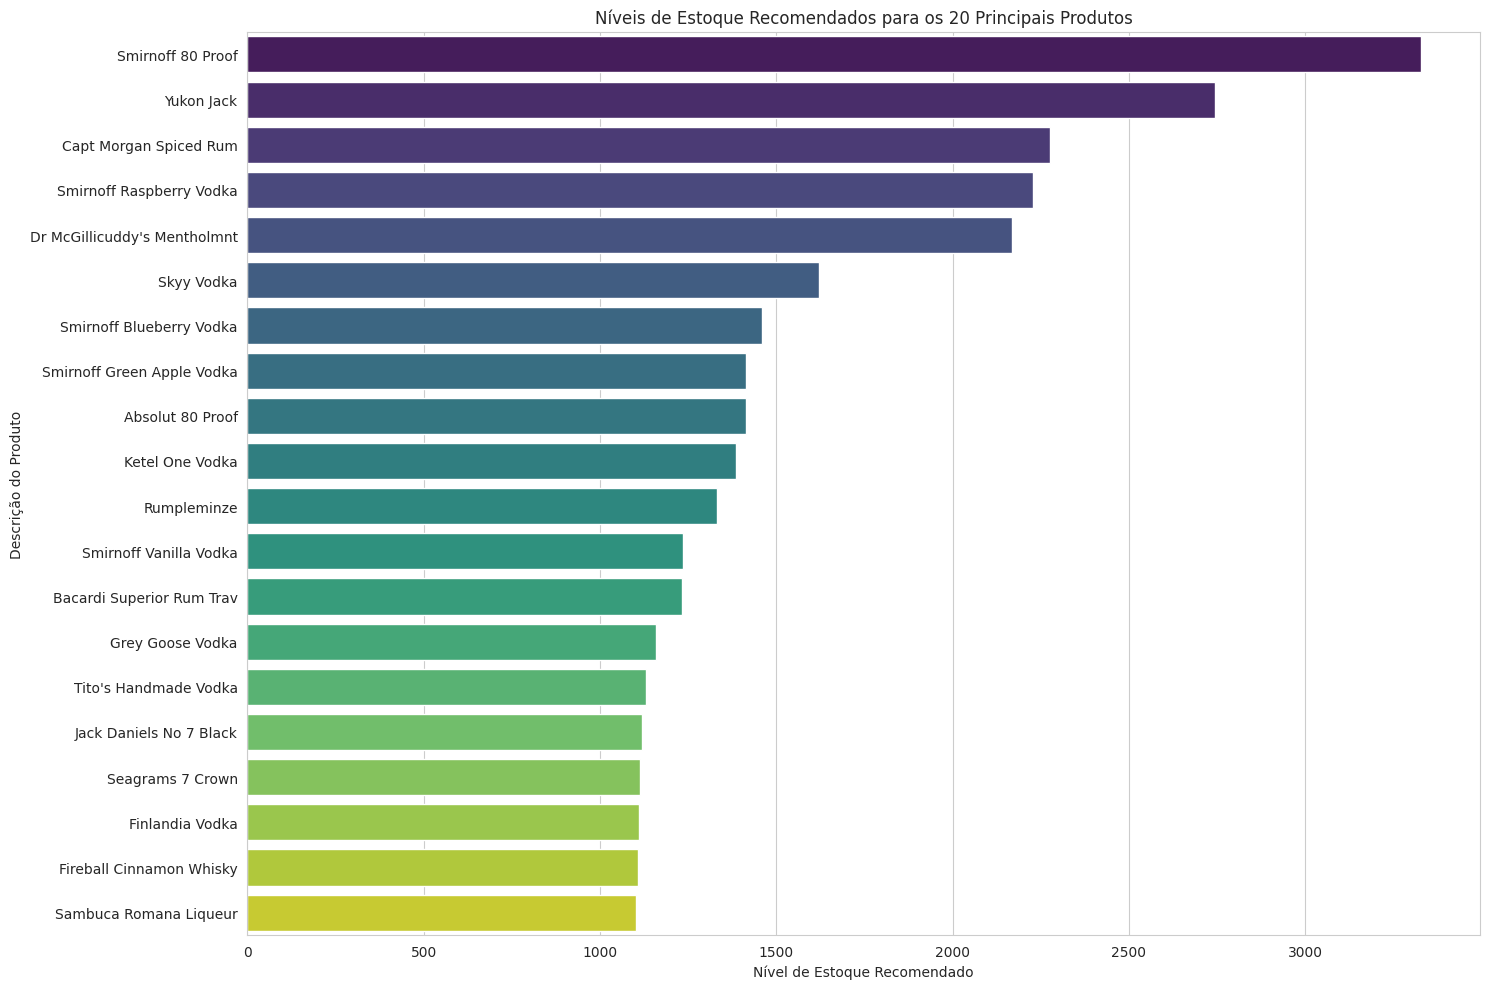

In [32]:
# Ordenando os dados por Recommended_Stock_Level para melhor visualização
dados_ordenados = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotando
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=dados_ordenados.head(20), palette='viridis')  # mostrando os 20 produtos principais para melhor visualização
plt.xlabel('Nível de Estoque Recomendado')
plt.ylabel('Descrição do Produto')
plt.title('Níveis de Estoque Recomendados para os 20 Principais Produtos')
plt.tight_layout()
plt.show()